In [1]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import datetime

OverflowError: ignored

In [ ]:
import pandas as pd
from google.colab import files
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

In [ ]:
df = pd.read_csv('out.csv')

In [ ]:
df.head()

,Status of Moratorium,Industrial Cluster / Area,State,CEPI SCORE-2009,CEPI SCORE-2011,CEPI SCORE-2013
0,Moratorium has been lifted,Agra,Uttar Pradesh,76.48,88.36,68.71
1,Moratorium has been lifted,Ahmedabad,Gujarat,75.28,78.09,69.54
2,Moratorium has been lifted,Angul Talcher,Orissa,82.09,89.74,72.86
3,Moratorium has been lifted,Asansol,West Bengal,70.20,70.96,56.01
4,Moratorium has been lifted,Aurangabad,Maharashtra,77.44,83.10,68.87


In [ ]:
df["location"] = df["Industrial Cluster / Area"] + ", "+ df["State"]

In [ ]:
df.head(3)

,Status of Moratorium,Industrial Cluster / Area,State,CEPI SCORE-2009,CEPI SCORE-2011,CEPI SCORE-2013,location
0,Moratorium has been lifted,Agra,Uttar Pradesh,76.48,88.36,68.71,"Agra, Uttar Pradesh"
1,Moratorium has been lifted,Ahmedabad,Gujarat,75.28,78.09,69.54,"Ahmedabad, Gujarat"
2,Moratorium has been lifted,Angul Talcher,Orissa,82.09,89.74,72.86,"Angul Talcher, Orissa"


In [ ]:
geo_location = Nominatim(user_agent="vishnu_cepi_calculation")

In [ ]:
location = geo_location.geocode('Angul Talcher, Orissa')

In [ ]:
location.latitude

Location(Angul, Angul - Talcher Road, Angul, Anugul, Odisha, 759123, India, (20.8602508, 85.1021043, 0.0))

In [ ]:
def find_lat_long(location):
  geo_location = Nominatim(user_agent="vishnu_cepi_calculation")
  try:
    loc_details = geo_location.geocode(location)
    return [loc_details.latitude, loc_details.longitude]
  except:
      return None, None

In [ ]:
a, b = find_lat_long('Angul Talcher, Orissa')

In [ ]:
df["lat_long"] = df["location"].map(find_lat_long, na_action="ignore")

In [ ]:
df.head()

,Unnamed: 0,Status of Moratorium,Industrial Cluster / Area,State,CEPI SCORE-2009,CEPI SCORE-2011,CEPI SCORE-2013,location,lat_long,latitude,longitude
0,0,Moratorium has been lifted,Agra,Uttar Pradesh,76.48,88.36,68.71,"Agra, Uttar Pradesh","[27.1752554, 78.0098161]",27.175255,78.009816
1,1,Moratorium has been lifted,Ahmedabad,Gujarat,75.28,78.09,69.54,"Ahmedabad, Gujarat","[23.0216238, 72.5797068]",23.021624,72.579707
2,2,Moratorium has been lifted,Angul Talcher,Orissa,82.09,89.74,72.86,"Angul Talcher, Orissa","[20.8602508, 85.1021043]",20.860251,85.102104
3,3,Moratorium has been lifted,Asansol,West Bengal,70.20,70.96,56.01,"Asansol, West Bengal","[23.6871297, 86.9746587]",23.687130,86.974659
4,4,Moratorium has been lifted,Aurangabad,Maharashtra,77.44,83.10,68.87,"Aurangabad, Maharashtra","[19.877263, 75.3390241]",19.877263,75.339024


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Status of Moratorium       43 non-null     object 
 1   Industrial Cluster / Area  43 non-null     object 
 2   State                      43 non-null     object 
 3   CEPI SCORE-2009            43 non-null     float64
 4   CEPI SCORE-2011            43 non-null     float64
 5   CEPI SCORE-2013            43 non-null     float64
 6   location                   43 non-null     object 
 7   lat_long                   43 non-null     object 
dtypes: float64(3), object(5)
memory usage: 2.8+ KB


In [ ]:
df['latitude'], df['longitude'] = df["lat_long"].str

<ipython-input-65-10ba06c64c72>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['latitude'], df['longitude'] = df["lat_long"].str


In [ ]:
df.head()

,Unnamed: 0,Status of Moratorium,Industrial Cluster / Area,State,CEPI SCORE-2009,CEPI SCORE-2011,CEPI SCORE-2013,location,lat_long,latitude,longitude
0,0,Moratorium has been lifted,Agra,Uttar Pradesh,76.48,88.36,68.71,"Agra, Uttar Pradesh","[27.1752554, 78.0098161]",27.175255,78.009816
1,1,Moratorium has been lifted,Ahmedabad,Gujarat,75.28,78.09,69.54,"Ahmedabad, Gujarat","[23.0216238, 72.5797068]",23.021624,72.579707
2,2,Moratorium has been lifted,Angul Talcher,Orissa,82.09,89.74,72.86,"Angul Talcher, Orissa","[20.8602508, 85.1021043]",20.860251,85.102104
3,3,Moratorium has been lifted,Asansol,West Bengal,70.20,70.96,56.01,"Asansol, West Bengal","[23.6871297, 86.9746587]",23.687130,86.974659
4,4,Moratorium has been lifted,Aurangabad,Maharashtra,77.44,83.10,68.87,"Aurangabad, Maharashtra","[19.877263, 75.3390241]",19.877263,75.339024


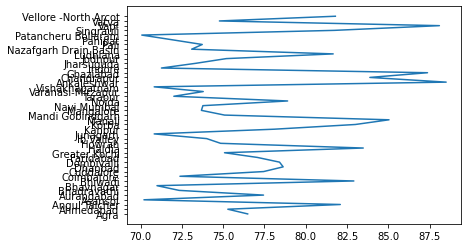

In [ ]:
plt.plot(df["CEPI SCORE-2009"], df["Industrial Cluster / Area"])

In [ ]:
df.shape

(43, 11)

In [ ]:
df.describe()

,Unnamed: 0,CEPI SCORE-2009,CEPI SCORE-2011,CEPI SCORE-2013,latitude,longitude
count,43.000000,43.000000,43.000000,43.000000,36.000000,36.000000
mean,21.000000,76.986977,77.542791,70.811163,22.591502,78.408233
std,12.556539,5.181878,9.140876,10.022805,5.185551,4.910842
min,0.000000,70.070000,54.160000,45.270000,11.060052,70.333333
25%,10.500000,73.215000,73.445000,65.205000,20.701703,75.215020
50%,21.000000,75.190000,78.670000,72.860000,22.646996,77.198968
75%,31.500000,81.695000,84.900000,78.345000,26.337807,82.630855
max,42.000000,88.500000,90.750000,85.310000,30.909016,88.325104


In [ ]:
def categorization(value):
  if value<50:
    return "Normal"
  elif value>50 and value <60:
    return "Polluted"
  elif value>60 and value <70:
    return "Severely polluted"
  else:
    return "Critically polluted"

In [ ]:
df["cepi_classification_2009"] = df["CEPI SCORE-2009"].map(categorization)

In [ ]:
df["cepi_classification_2011"] = df["CEPI SCORE-2011"].map(categorization)

In [ ]:
df["cepi_classification_2013"] = df["CEPI SCORE-2013"].map(categorization)

In [ ]:
df.head()

,Unnamed: 0,Status of Moratorium,Industrial Cluster / Area,State,CEPI SCORE-2009,CEPI SCORE-2011,CEPI SCORE-2013,location,lat_long,latitude,longitude,cepi_classification_2009,cepi_classification_2011,cepi_classification_2013
0,0,Moratorium has been lifted,Agra,Uttar Pradesh,76.48,88.36,68.71,"Agra, Uttar Pradesh","[27.1752554, 78.0098161]",27.175255,78.009816,Critically polluted,Critically polluted,Severely polluted
1,1,Moratorium has been lifted,Ahmedabad,Gujarat,75.28,78.09,69.54,"Ahmedabad, Gujarat","[23.0216238, 72.5797068]",23.021624,72.579707,Critically polluted,Critically polluted,Severely polluted
2,2,Moratorium has been lifted,Angul Talcher,Orissa,82.09,89.74,72.86,"Angul Talcher, Orissa","[20.8602508, 85.1021043]",20.860251,85.102104,Critically polluted,Critically polluted,Critically polluted
3,3,Moratorium has been lifted,Asansol,West Bengal,70.20,70.96,56.01,"Asansol, West Bengal","[23.6871297, 86.9746587]",23.687130,86.974659,Critically polluted,Critically polluted,Polluted
4,4,Moratorium has been lifted,Aurangabad,Maharashtra,77.44,83.10,68.87,"Aurangabad, Maharashtra","[19.877263, 75.3390241]",19.877263,75.339024,Critically polluted,Critically polluted,Severely polluted


In [ ]:
category_2009 = df["cepi_classification_2009"].value_counts()

In [ ]:
category_2011 = df["cepi_classification_2011"].value_counts()

In [ ]:
category_2013 = df["cepi_classification_2013"].value_counts()

In [ ]:
category_2009["Critically polluted"]

43

In [ ]:
category_2011

Critically polluted    34
Severely polluted       6
Polluted                3
Name: cepi_classification_2011, dtype: int64

In [ ]:
category_2013

Critically polluted    27
Severely polluted       8
Polluted                7
Normal                  1
Name: cepi_classification_2013, dtype: int64

In [ ]:
df_1 = pd.DataFrame({
    '2009': category_2009,
    '2011': category_2011,
    '2013': category_2013
})

In [ ]:
df_1.head()

,2009,2011,2013
Critically polluted,43.0,34.0,27
Normal,NaN,NaN,1
Polluted,NaN,3.0,7
Severely polluted,NaN,6.0,8


In [ ]:
df_1 = df_1.fillna(0)

In [ ]:
df_1

,2009,2011,2013
Critically polluted,43.0,34.0,27
Normal,0.0,0.0,1
Polluted,0.0,3.0,7
Severely polluted,0.0,6.0,8


Text(0, 0.5, 'Count')

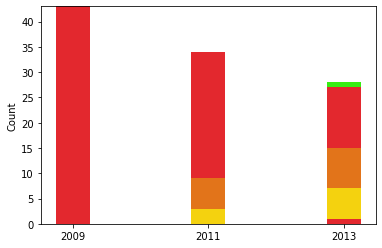

In [ ]:
f, ax = plt.subplots()
width = 0.25
labels = ['2009', '2011', '2013']
# ax.ylimit
ax.bar(labels, df_1.iloc[0], width, label="Critically polluted", color="#e3282e")
ax.bar(labels, df_1.iloc[1], width, label="Normal", bottom=df_1.iloc[0], color="#36ee12")
ax.bar(labels, df_1.iloc[2], width, label="Polluted", bottom=df_1.iloc[1], color="#f4d20f")
ax.bar(labels, df_1.iloc[3], width, label="Severely Polluted", bottom=df_1.iloc[2], color="#e2741a")
ax.set_ylabel("Count")
# ax.legend()



In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Mar  4 13:05:10 2023

@author: vishnujayan
"""

nums = [1,343,43,5,342,324,32]
largest, second_largest = 0,0
for i in  nums:
    if largest< i:
        second_largest = largest
        largest = i
        
    
print(f" largest number is {largest} and second largest number is {second_largest}")

 largest number is 343 and second largest number is 1


In [ ]:
sorted_array = sorted(nums)

In [ ]:
sorted_array

[1, 5, 32, 43, 324, 342, 343]

In [ ]:
[0190235 0290292 0290294 0290295 0290303 0290340 0290372 0290373 0290376
0290385 0290386 0290390 0290395 0290396 0290398 0290424 0290432 0290433
0290437 0290441 0290444 0290447 0290448 0290449 0290450 0290453 0290459
0290464 0290469 0290479 0290483 0290486 0290496 0290505 0290512 0290516
0290518 0290519 0290522 0290524 0290527 0290531 0290532 0290548 0290550
0290555 0290559 0290566 0290569 0290577 0290585 0290588 0290592 0290598
0390400 0390445 0490690 0490705 0490735 0590544 0590549 0590550 0590556
0590567 0590569 0590588 0590601 0590634 0590641 0590652 0590658 0590673
0691113 0691127 0691191 0691205 0691223 0691229 0691239 0691255 0691269
0691273 0691282 0691304 0691310 0691316 0691317 0691341 0691364 0691378
0691406 0691409 0691416 0691420 0691421 0691422 0691427 0691435 0691443
0691450 0691466 0691468 0691470 0691473 0691475 0691478 0691498 0691514
0691521 0691525 0691535 0691538 0691544 0691552 0691572 0791502 0891194
0891218 0891273 0891302 0891385 0891389 0891396 0891397 0891404 0891419
0891450 0891458 0891470 0891472 0891509 0891539 0891541 0891582 0891593
0891596 0891625 0891657 0891665 0891689 0891721 0891732 0891751 0891754
0891760 0891808 0891820 0891825 0891826 0891827 0891829 0891841 0891854
0891872 0891879 0891885 0891901 0891916 0891930 0891942 0891957 0891961
0892005 0892021 0892032 0892033 0892040 0892066 0892068 0892072 0892079
1090943 1090944 1090945 1090972 1091087 1091089 1190387 1190445 1190490
1190504 1190512 1190522 1190542 1190554 1190619 1190645 1190649 1290569
1590278 1590289 1590294 1590303 1590315 1590321 1590322 1590324 1590327
1790038 1990800 1990853 1990857 1990861 2690622 2690640 2690739 2690750
2690752 2690754 2690759 2690778 2690785 2690803 2690805 2690841 2690851
2690865 2690866 2690873 2690875 2690904 2690914 2690917 2690925 2690927
2690951 2690966 2690968 2690971 3490141 3590268 3590274 3590284 3590313
3590315 3590326]

In [ ]:
pd.to_datetime(1677962187410282, unit='ns')

Timestamp('1970-01-20 10:06:02.187410282')

In [ ]:
temp_data = pd.read_csv('ee-chart.csv');

In [ ]:
temp_data.isnull().count()

system:time_start    37
0                    37
dtype: int64

In [ ]:
data = temp_data.dropna(axis=0)

In [ ]:
data


,system:time_start,0
2,"Feb 25, 2023",0.134
4,"Feb 26, 2023",-0.152
7,"Feb 27, 2023",-0.233
9,"Feb 28, 2023",-1.376
18,"Mar 1, 2023",-0.918
22,"Mar 2, 2023",0.801
26,"Mar 3, 2023",0.013
34,"Mar 4, 2023",-0.222


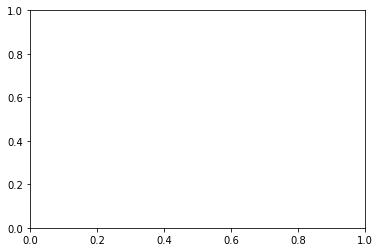

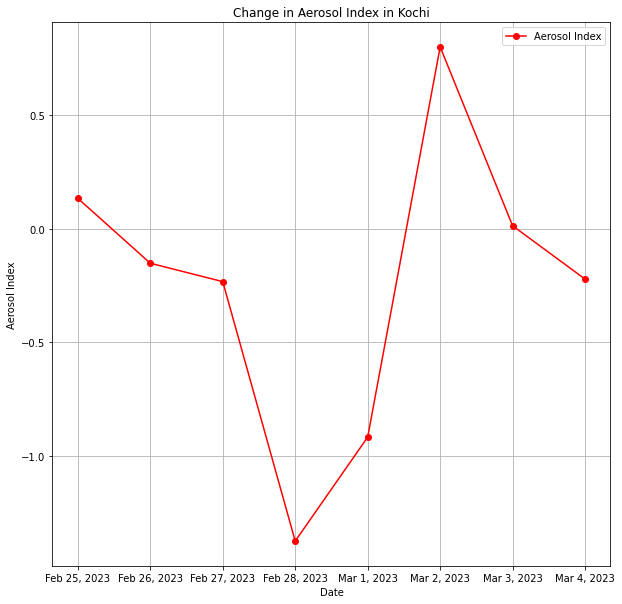

In [ ]:
fig, ax = plt.subplots()
data.plot('system:time_start', '0', xlabel="Date", 
          ylabel="Aerosol Index", 
          color="red",
          title="Change in Aerosol Index in Kochi",
          style="-o",
          figsize = (10,10),
          ax=ax,
          grid=True
          )
ax.legend(["Aerosol Index"])

In [ ]:
list = [1,2,3,4,5]
tuple_ = tuple(list)

In [ ]:
print(tuple_)

(1, 2, 3, 4, 5)


In [ ]:
def feb(n):
  a, b = 0,1 
  for i in range(n):
    yield(a)
    a,b = b, a+b

In [ ]:
feb(3)

<generator object feb at 0x7fc7d883ea50>

In [ ]:
for i in feb(5):
  print(i)

0
1
1
2
3


In [ ]:
list[-3::1]

[3, 4, 5]

In [ ]:
abc = [234,3434,5,54,2343,54,544]

print(len(abc))
j = 0

while j< l-1:
  if abc[j] > abc[j+1]:
    abc[j], abc[j+1] = abc[j+1], abc[j]
    j = -1
  j +=1

TypeError: ignored

In [ ]:
lst1=[1,2,3,4] 
len(lst1)

TypeError: ignored